In [129]:
import numpy as np
import energyflow as ef
import matplotlib.pyplot as plt

In [130]:
zjets = ef.zjets_delphes.load('Pythia21', num_data=1000000, pad=False, exclude_keys=['particles','gen_particles'])

In [131]:
zjets

{'gen_mults': array([26, 33, 42, ..., 30, 25, 17]),
 'gen_Zs': array([[350.27255  ,   0.6402142,   6.071719 ],
        [231.91399  ,  -1.1794064,   2.9520912],
        [215.97299  ,   2.416496 ,   3.7995496],
        ...,
        [201.19827  ,   0.6049641,   2.4719281],
        [231.5413   ,  -0.7952752,   3.2777257],
        [271.32584  ,  -2.219085 ,   1.7324365]], dtype=float32),
 'gen_widths': array([0.06788718, 0.16862751, 0.32043345, ..., 0.12102533, 0.11841577,
        0.08658481]),
 'gen_sdms': array([ 6.93012355, 16.10851408, 28.81563943, ...,  7.25739448,
         4.98659693,  7.61327704]),
 'gen_ang2s': array([0.01195616, 0.0617166 , 0.13394843, ..., 0.03641587, 0.03688685,
        0.01654238]),
 'gen_tau2s': array([0.05637227, 0.13249798, 0.13454527, ..., 0.11454477, 0.08577446,
        0.04213763]),
 'gen_zgs': array([0.29929177, 0.35579835, 0.31750095, ..., 0.12382881, 0.1745379 ,
        0.12756201]),
 'gen_jets': array([[ 3.41452759e+02,  1.77505480e+00,  2.90699697e+00

In [140]:
gen_Zs = []
gen_mults = []
gen_jets = []
gen_widths = []
gen_tau2s = []
gen_zgs = []
gen_sdms = []

sim_mults = []
sim_jets = []
sim_widths = []
sim_tau2s = []
sim_zgs = []
sim_sdms = []
for line in open("/global/cfs/cdirs/m3246/AnomalyDetection/ILC/Delphes-3.5.0/test_Omni.txt"):
    if 'truth' in line:
        ZpT = float(line.split()[2])
        if (ZpT > 200):
            gen_Zs+=[[ZpT,0.,0.]]
            gen_mults+=[int(line.split()[14])]
            gen_jets+=[[float(line.split()[3]),float(line.split()[4]),float(line.split()[5]),float(line.split()[6])]]
            gen_widths+=[float(line.split()[7])]
            gen_tau2s+=[float(line.split()[8])]
            zg = float(line.split()[13])
            if np.isnan(zg):
                zg = 0.
                pass
            gen_zgs+=[zg]
            gen_sdms+=[float(line.split()[12])]
            pass
        pass
    if 'reco' in line:
        ZpT = float(line.split()[2])
        if (ZpT > 200):
            sim_mults+=[int(line.split()[14])]
            sim_jets+=[[float(line.split()[3]),float(line.split()[4]),float(line.split()[5]),float(line.split()[6])]]
            sim_widths+=[float(line.split()[7])]
            sim_tau2s+=[float(line.split()[8])]
            zg = float(line.split()[13])
            if np.isnan(zg):
                zg = 0.
                pass
            sim_zgs+=[zg]
            sim_sdms+=[float(line.split()[12])]
            pass
        pass
    pass
zjets_bigger = {}
zjets_bigger['gen_Zs'] = np.array(gen_Zs)
zjets_bigger['gen_mults'] = np.array(gen_mults)
zjets_bigger['gen_jets'] = np.array(gen_jets)
zjets_bigger['gen_widths'] = np.array(gen_widths)
zjets_bigger['gen_tau2s'] = np.array(gen_tau2s)
zjets_bigger['gen_zgs'] = np.array(gen_zgs)
zjets_bigger['gen_sdms'] = np.array(gen_sdms)

zjets_bigger['sim_mults'] = np.array(sim_mults)
zjets_bigger['sim_jets'] = np.array(sim_jets)
zjets_bigger['sim_widths'] = np.array(sim_widths)
zjets_bigger['sim_tau2s'] = np.array(sim_tau2s)
zjets_bigger['sim_zgs'] = np.array(sim_zgs)
zjets_bigger['sim_sdms'] = np.array(sim_sdms)

(array([0.01565711, 0.01154603, 0.00854289, 0.00639668, 0.00478569,
        0.00361238, 0.00279231, 0.00213709, 0.00170294, 0.00134409,
        0.00106229, 0.00085692, 0.00070008, 0.00056279, 0.00046362,
        0.00038064, 0.0003188 , 0.00025696, 0.00021403]),
 array([200.        , 215.78947368, 231.57894737, 247.36842105,
        263.15789474, 278.94736842, 294.73684211, 310.52631579,
        326.31578947, 342.10526316, 357.89473684, 373.68421053,
        389.47368421, 405.26315789, 421.05263158, 436.84210526,
        452.63157895, 468.42105263, 484.21052632, 500.        ]),
 <BarContainer object of 19 artists>)

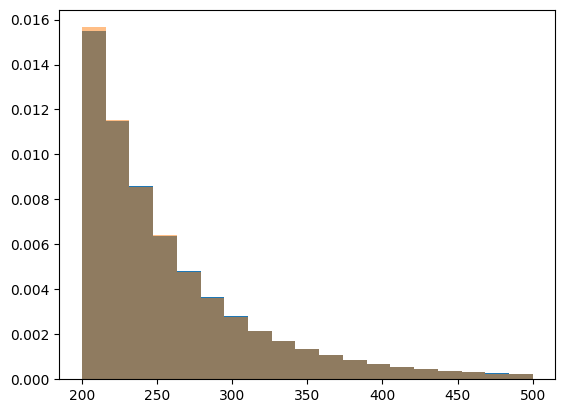

In [133]:
plt.hist(zjets['gen_Zs'][:,0],bins=np.linspace(200,500,20),density=True)
plt.hist(zjets_bigger['gen_Zs'][:,0],bins=np.linspace(200,500,20),density=True,alpha=0.5)

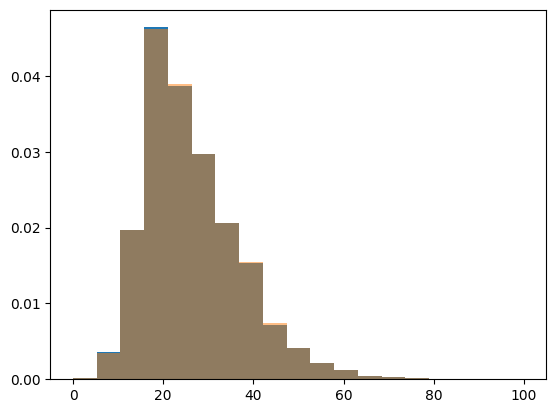

In [134]:
_=plt.hist(zjets['gen_mults'],bins=np.linspace(0,100,20),density=True)
_=plt.hist(zjets_bigger['gen_mults'],bins=np.linspace(0,100,20),density=True,alpha=0.5)

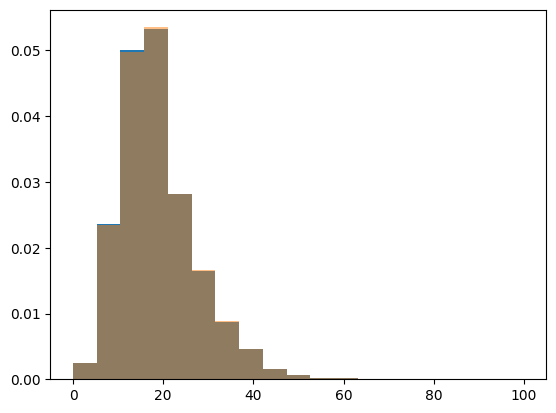

In [141]:
_=plt.hist(zjets['sim_mults'],bins=np.linspace(0,100,20),density=True)
_=plt.hist(zjets_bigger['sim_mults'],bins=np.linspace(0,100,20),density=True,alpha=0.5)

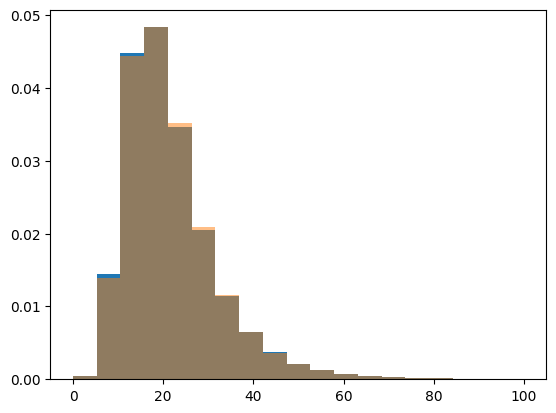

In [135]:
_=plt.hist(zjets['gen_jets'][:,3],bins=np.linspace(0,100,20),density=True)
_=plt.hist(zjets_bigger['gen_jets'][:,3],bins=np.linspace(0,100,20),density=True,alpha=0.5)

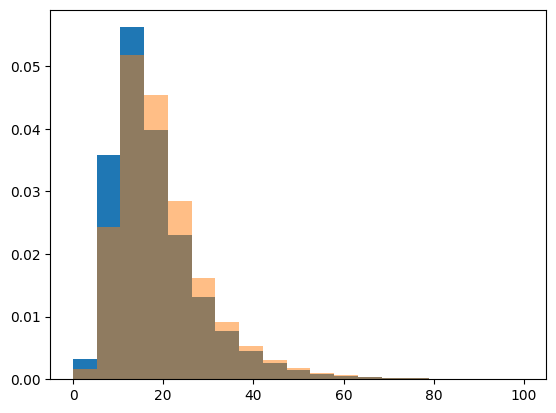

In [142]:
_=plt.hist(zjets['sim_jets'][:,3],bins=np.linspace(0,100,20),density=True)
_=plt.hist(zjets_bigger['sim_jets'][:,3],bins=np.linspace(0,100,20),density=True,alpha=0.5)

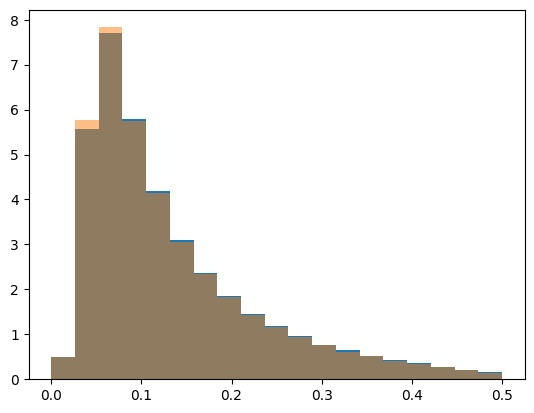

In [136]:
_=plt.hist(zjets['gen_widths'],bins=np.linspace(0,0.5,20),density=True)
_=plt.hist(zjets_bigger['gen_widths'],bins=np.linspace(0,0.5,20),density=True,alpha=0.5)

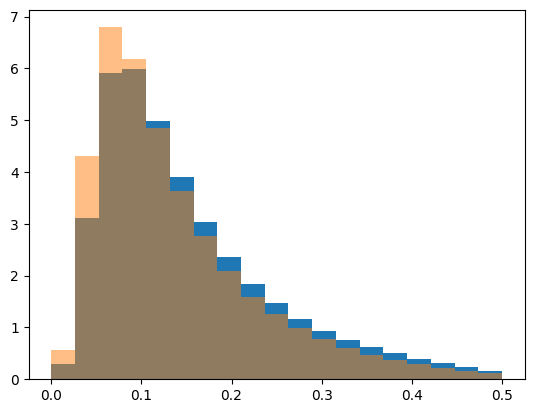

In [143]:
_=plt.hist(zjets['sim_widths'],bins=np.linspace(0,0.5,20),density=True)
_=plt.hist(zjets_bigger['sim_widths'],bins=np.linspace(0,0.5,20),density=True,alpha=0.5)

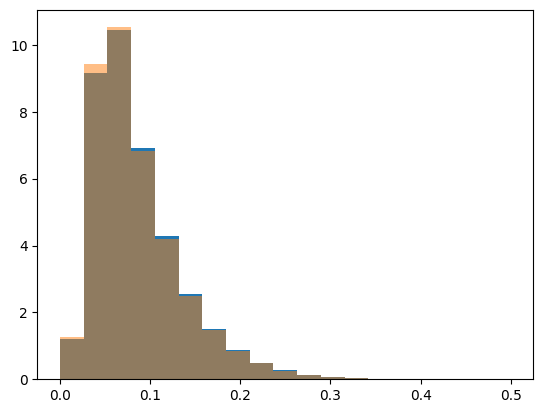

In [137]:
_=plt.hist(zjets['gen_tau2s'],bins=np.linspace(0,0.5,20),density=True)
_=plt.hist(zjets_bigger['gen_tau2s'],bins=np.linspace(0,0.5,20),density=True,alpha=0.5)

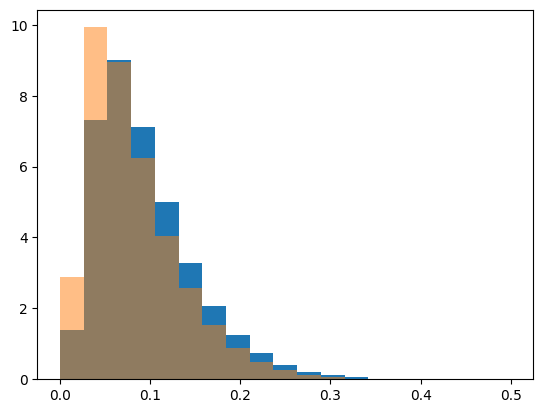

In [144]:
_=plt.hist(zjets['sim_tau2s'],bins=np.linspace(0,0.5,20),density=True)
_=plt.hist(zjets_bigger['sim_tau2s'],bins=np.linspace(0,0.5,20),density=True,alpha=0.5)

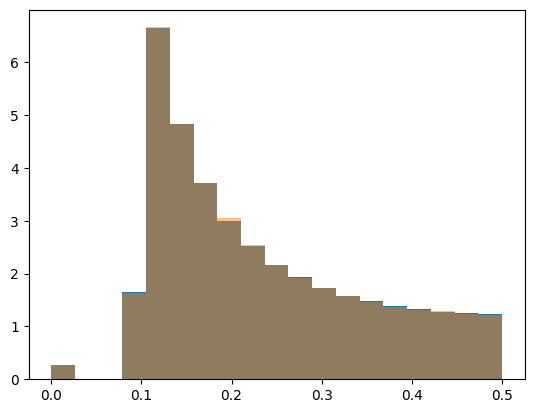

In [138]:
_=plt.hist(zjets['gen_zgs'],bins=np.linspace(0,0.5,20),density=True)
_=plt.hist(zjets_bigger['gen_zgs'],bins=np.linspace(0,0.5,20),density=True,alpha=0.5)

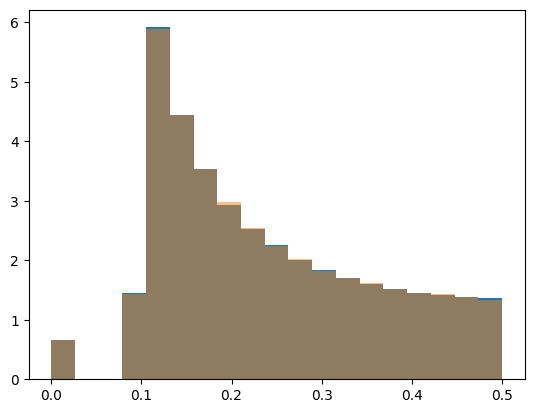

In [145]:
_=plt.hist(zjets['sim_zgs'],bins=np.linspace(0,0.5,20),density=True)
_=plt.hist(zjets_bigger['sim_zgs'],bins=np.linspace(0,0.5,20),density=True,alpha=0.5)

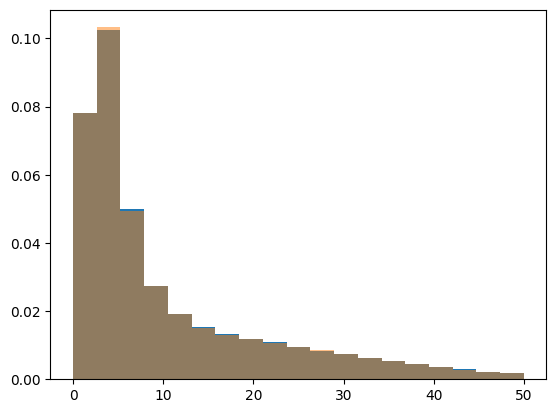

In [139]:
_=plt.hist(zjets['gen_sdms'],bins=np.linspace(0,50,20),density=True)
_=plt.hist(zjets_bigger['gen_sdms'],bins=np.linspace(0,50,20),density=True,alpha=0.5)

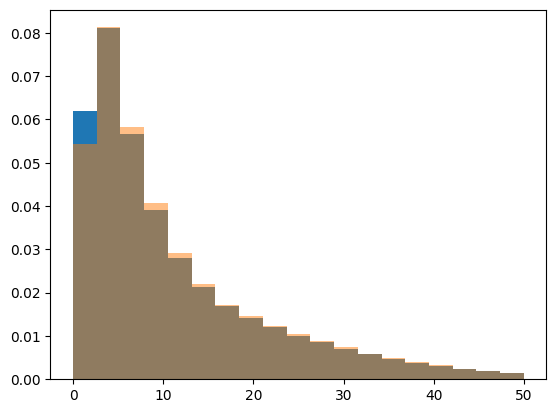

In [146]:
_=plt.hist(zjets['sim_sdms'],bins=np.linspace(0,50,20),density=True)
_=plt.hist(zjets_bigger['sim_sdms'],bins=np.linspace(0,50,20),density=True,alpha=0.5)